In [1]:
import base64
import requests
import json
from config import sportskey
from config import password
from config import gkey
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import os
from ohmysportsfeedspy import MySportsFeeds
import gmaps

msf = MySportsFeeds(version="2.0")
msf.authenticate(sportskey, "MYSPORTSFEEDS")

In [2]:
output = msf.msf_get_data(league='mlb',season='2019-regular',feed='seasonal_player_stats',format='json')

In [3]:
output

{'lastUpdatedOn': '2020-04-15T21:29:02.598Z',
 'playerStatsTotals': [{'player': {'id': 10277,
    'firstName': 'Fernando',
    'lastName': 'Abad',
    'primaryPosition': 'P',
    'jerseyNumber': 50,
    'currentTeam': {'id': 136, 'abbreviation': 'SF'},
    'currentRosterStatus': 'UFA',
    'currentInjury': None,
    'height': '6\'1"',
    'weight': 220,
    'birthDate': '1985-12-17',
    'age': 34,
    'birthCity': 'La Romana',
    'birthCountry': 'Dominican Republic',
    'rookie': False,
    'highSchool': None,
    'college': None,
    'handedness': {'bats': 'L', 'throws': 'L'},
    'officialImageSrc': 'http://mlb.mlb.com/mlb/images/players/head_shot/472551.jpg',
    'socialMediaAccounts': []},
   'team': {'id': 136, 'abbreviation': 'SF'},
   'stats': {'gamesPlayed': 21,
    'batting': {'atBats': 0,
     'runs': 0,
     'hits': 0,
     'secondBaseHits': 0,
     'thirdBaseHits': 0,
     'homeruns': 0,
     'earnedRuns': 0,
     'unearnedRuns': 0,
     'runsBattedIn': 0,
     'batterWa

In [4]:
num_records = len(output["playerStatsTotals"])
num_records

2863

In [5]:
output["playerStatsTotals"][13]["player"]["officialImageSrc"]


'http://mlb.mlb.com/mlb/images/players/head_shot/451192.jpg'

In [6]:
stats_df = pd.DataFrame(columns=['Name', 'Team', 'Age', 'Birth City', 'Birth Country', 'Birth Lat', 'Birth Lng', 'College', 'College Lat', 'College Lng', 'ID'], index = np.arange(num_records))
stats_df


Name Team  Age Birth City Birth Country Birth Lat Birth Lng College  \
0     NaN  NaN  NaN        NaN           NaN       NaN       NaN     NaN   
1     NaN  NaN  NaN        NaN           NaN       NaN       NaN     NaN   
2     NaN  NaN  NaN        NaN           NaN       NaN       NaN     NaN   
3     NaN  NaN  NaN        NaN           NaN       NaN       NaN     NaN   
4     NaN  NaN  NaN        NaN           NaN       NaN       NaN     NaN   
...   ...  ...  ...        ...           ...       ...       ...     ...   
2858  NaN  NaN  NaN        NaN           NaN       NaN       NaN     NaN   
2859  NaN  NaN  NaN        NaN           NaN       NaN       NaN     NaN   
2860  NaN  NaN  NaN        NaN           NaN       NaN       NaN     NaN   
2861  NaN  NaN  NaN        NaN           NaN       NaN       NaN     NaN   
2862  NaN  NaN  NaN        NaN           NaN       NaN       NaN     NaN   

     College Lat College Lng   ID  
0            NaN         NaN  NaN  
1            NaN         NaN  NaN  
2            NaN         NaN  NaN  
3            NaN         NaN  NaN  
4            NaN         NaN  NaN  
...          ...         ...  ...  
2858         NaN         NaN  NaN  
2859         NaN         NaN  NaN  
2860         NaN         NaN  NaN  
2861         NaN         NaN  NaN  
2862         NaN         NaN  NaN  

[2863 rows x 11 columns]

In [7]:
for x in range(num_records):
    stats_df.loc[x, 'Name'] = output["playerStatsTotals"][x]["player"]["firstName"] + " " + output["playerStatsTotals"][x]["player"]["lastName"]
    try:
        stats_df.loc[x, 'Team'] = output["playerStatsTotals"][x]["player"]["currentTeam"]["abbreviation"]
    except: 
        stats_df.loc[x, 'Team'] = output["playerStatsTotals"][x]["team"]["abbreviation"]
    stats_df.loc[x, 'Age'] = output["playerStatsTotals"][x]["player"]["age"]
    stats_df.loc[x, 'Birth City'] = output["playerStatsTotals"][x]["player"]["birthCity"]
    stats_df.loc[x, 'Birth Country'] = output["playerStatsTotals"][x]["player"]["birthCountry"]
    stats_df.loc[x, 'College'] = output["playerStatsTotals"][x]["player"]["college"]
    stats_df.loc[x, 'ID'] = output["playerStatsTotals"][x]["player"]["officialImageSrc"]
        #stats_df.loc[x, 'Ability Score'] = output["playerStatsTotals"][x]["stats"]["rebounds"]["rebPerGame"] + output["playerStatsTotals"][x]["stats"]["offense"]["ptsPerGame"] + output["playerStatsTotals"][x]["stats"]["offense"]["astPerGame"] + output["playerStatsTotals"][x]["stats"]["defense"]["stlPerGame"] + output["playerStatsTotals"][x]["stats"]["defense"]["blkPerGame"]        

stats_df.head(60)

Name Team Age                Birth City       Birth Country  \
0       Fernando Abad   SF  34                 La Romana  Dominican Republic   
1         Bryan Abreu  HOU  22      Santo Domingo Centro  Dominican Republic   
2          José Abreu  CWS  33                Cienfuegos                Cuba   
3    Ronald Acuña Jr.  ATL  22                 La Guaira           Venezuela   
4          Jason Adam  CHC  28         Overland Park, KS                 USA   
5    Cristhian Adames   SF  28             Santo Domingo  Dominican Republic   
6        Willy Adames   TB  24                  Santiago  Dominican Republic   
7        Austin Adams  SEA  28                 Tampa, FL                 USA   
8        Austin Adams  MIN  33            Montgomery, AL                 USA   
9        Austin Adams  MIN  33            Montgomery, AL                 USA   
10       Austin Adams  SEA  28                 Tampa, FL                 USA   
11       Chance Adams   KC  25            Scottsdale, AZ                 USA   
12         Matt Adams  WAS  31           Philipsburg, PA                 USA   
13         Jim Adduci  CHC  34               Burnaby, BC              Canada   
14     Ehire Adrianza  MIN  30                   Miranda           Venezuela   
15      Dario Agrazal  DET  25                 Aguadulce              Panama   
16      Jesús Aguilar  MIA  29                   Maracay           Venezuela   
17      Jesús Aguilar  MIA  29                   Maracay           Venezuela   
18         Nick Ahmed  ARI  30           Springfield, MA                 USA   
19        R.J. Alaniz  CIN  28               McAllen, TX                 USA   
20        R.J. Alaniz  CIN  28               McAllen, TX                 USA   
21        Matt Albers  MIL  37               Houston, TX                 USA   
22     Hanser Alberto  BAL  27  San Francisco de Macoris  Dominican Republic   
23       Ozzie Albies  ATL  23                Willemstad             Curacao   
24       Jorge Alcala  MIN  24            Bajos de Haina  Dominican Republic   
25    Sandy Alcantara  MIA  24                      Azua  Dominican Republic   
26   Victor Alcantara  DET  27             Santo Domingo  Dominican Republic   
27    Scott Alexander  LAD  30            Santa Rosa, CA                 USA   
28    Tyler Alexander  DET  25               Chicago, IL                 USA   
29       Jorge Alfaro  MIA  26                 Sincelejo            Colombia   
30     Anthony Alford  TOR  25              Columbia, MS                 USA   
31       Kolby Allard  TEX  22               Anaheim, CA                 USA   
32       Austin Allen  OAK  26             St. Louis, MO                 USA   
33         Cody Allen  TEX  31               Orlando, FL                 USA   
34         Greg Allen  CLE  27             San Diego, CA                 USA   
35        Logan Allen  CLE  22                      None                None   
36        Logan Allen  CLE  22                      None                None   
37    Abraham Almonte   SD  30             Santo Domingo  Dominican Republic   
38      Yency Almonte  COL  25                 Miami, FL                 USA   
39  Albert Almora Jr.  CHC  25               Hialeah, FL                 USA   
40        Pete Alonso  NYM  25                 Tampa, FL                 USA   
41      Yonder Alonso  ATL  33                    Havana                Cuba   
42      Yonder Alonso  ATL  33                    Havana                Cuba   
43      Dan Altavilla  SEA  27            McKeesport, PA                 USA   
44      Aaron Altherr  PHI  29                 Landstuhl             Germany   
45      Aaron Altherr   SF  29                 Landstuhl             Germany   
46      Aaron Altherr  NYM  29                 Landstuhl             Germany   
47        José Altuve  HOU  29                   Maracay           Venezuela   
48      José Alvarado   TB  24                 Maracaibo           Venezuela   
49       José Álv

In [8]:
stats_df["ID"] = stats_df["ID"].str.split('\/').str[7]
stats_df["ID"] = stats_df["ID"].str.split('.').str[0]
stats_df = stats_df.drop_duplicates(subset=['ID'], keep='first')
stats_df.head(60)

Name Team Age                Birth City       Birth Country  \
0       Fernando Abad   SF  34                 La Romana  Dominican Republic   
1         Bryan Abreu  HOU  22      Santo Domingo Centro  Dominican Republic   
2          José Abreu  CWS  33                Cienfuegos                Cuba   
3    Ronald Acuña Jr.  ATL  22                 La Guaira           Venezuela   
4          Jason Adam  CHC  28         Overland Park, KS                 USA   
5    Cristhian Adames   SF  28             Santo Domingo  Dominican Republic   
6        Willy Adames   TB  24                  Santiago  Dominican Republic   
7        Austin Adams  SEA  28                 Tampa, FL                 USA   
8        Austin Adams  MIN  33            Montgomery, AL                 USA   
11       Chance Adams   KC  25            Scottsdale, AZ                 USA   
12         Matt Adams  WAS  31           Philipsburg, PA                 USA   
13         Jim Adduci  CHC  34               Burnaby, BC              Canada   
14     Ehire Adrianza  MIN  30                   Miranda           Venezuela   
15      Dario Agrazal  DET  25                 Aguadulce              Panama   
16      Jesús Aguilar  MIA  29                   Maracay           Venezuela   
18         Nick Ahmed  ARI  30           Springfield, MA                 USA   
19        R.J. Alaniz  CIN  28               McAllen, TX                 USA   
21        Matt Albers  MIL  37               Houston, TX                 USA   
22     Hanser Alberto  BAL  27  San Francisco de Macoris  Dominican Republic   
23       Ozzie Albies  ATL  23                Willemstad             Curacao   
24       Jorge Alcala  MIN  24            Bajos de Haina  Dominican Republic   
25    Sandy Alcantara  MIA  24                      Azua  Dominican Republic   
26   Victor Alcantara  DET  27             Santo Domingo  Dominican Republic   
27    Scott Alexander  LAD  30            Santa Rosa, CA                 USA   
28    Tyler Alexander  DET  25               Chicago, IL                 USA   
29       Jorge Alfaro  MIA  26                 Sincelejo            Colombia   
30     Anthony Alford  TOR  25              Columbia, MS                 USA   
31       Kolby Allard  TEX  22               Anaheim, CA                 USA   
32       Austin Allen  OAK  26             St. Louis, MO                 USA   
33         Cody Allen  TEX  31               Orlando, FL                 USA   
34         Greg Allen  CLE  27             San Diego, CA                 USA   
35        Logan Allen  CLE  22                      None                None   
37    Abraham Almonte   SD  30             Santo Domingo  Dominican Republic   
38      Yency Almonte  COL  25                 Miami, FL                 USA   
39  Albert Almora Jr.  CHC  25               Hialeah, FL                 USA   
40        Pete Alonso  NYM  25                 Tampa, FL                 USA   
41      Yonder Alonso  ATL  33                    Havana                Cuba   
43      Dan Altavilla  SEA  27            McKeesport, PA                 USA   
44      Aaron Altherr  PHI  29                 Landstuhl             Germany   
47        José Altuve  HOU  29                   Maracay           Venezuela   
48      José Alvarado   TB  24                 Maracaibo           Venezuela   
49       José Álvarez  PHI  30                 Barcelona           Venezuela   
50     Yordan Alvarez  HOU  22                      None                None   
51     Adbert Alzolay  CHC  25                Pto. Ordaz           Venezuela   
52     Brett Anderson  MIL  32               Midland, TX                 USA   
53     Brian Anderson  MIA  26                Edmond, OK                 USA   
54     Chase Anderson  TOR  32         Wichita Falls, TX                 USA   
55      Cody Anderson  CLE  29                Quincy, CA                 USA   
56      Drew Anderson  CWS  26                  Reno, NV                 USA   
57    Justin Ande

In [9]:
stats_df.to_csv('stats_df.csv', index = False, header=True)

In [10]:
warbatting = "Resources/war_daily_bat_year.txt"
warpitching = "Resources/war_daily_pitch_year.txt"

warbatting_df = pd.read_csv(warbatting)
warpitching_df = pd.read_csv(warpitching)

In [ ]:
warbatting_df

In [11]:
warbatting = "Resources/war_daily_bat_year.txt"
warpitching = "Resources/war_daily_pitch_year.txt"

warbatting_df = pd.read_csv(warbatting)
warpitching_df = pd.read_csv(warpitching)

war2019batting_df = warbatting_df.loc[warbatting_df['year_ID'] == 2019,:]
war2019batting_df = war2019batting_df[['name_common', 'mlb_ID', 'WAR']]

war2019pitching_df = warpitching_df.loc[warpitching_df['year_ID'] == 2019,:]
war2019pitching_df = war2019pitching_df[['name_common', 'mlb_ID', 'WAR']]


war2019batting_df = war2019batting_df.dropna(axis = 0, how ='any')
war2019pitching_df = war2019pitching_df.dropna(axis = 0, how ='any')



In [ ]:
war2019batting_df

In [ ]:
# war2019batting_df["Player Name"] = war2019batting_df["Name"].str.split('\\').str[0]

# war2019batting_df["Player Name"] = war2019batting_df["Player Name"].str.replace("*","")
# war2019batting_df["Player Name"] = war2019batting_df["Player Name"].str.replace("#","")

# war2019batting_df["playerID"] = war2019batting_df["Name"].str.split('\\').str[1]

# war2019batting_df = war2019batting_df[['Player Name', 'Tm', 'WAR']]

# war2019batting_df = war2019batting_df.dropna(axis = 0, how ='any')
                                   
# war2019batting_df


In [ ]:
# war2019pitching_df["Player Name"] = war2019pitching_df["Name"].str.split('\\').str[0]

# war2019pitching_df["Player Name"] = war2019pitching_df["Player Name"].str.replace("*","")
# war2019pitching_df["Player Name"] = war2019pitching_df["Player Name"].str.replace("#","")

# war2019pitching_df["playerID"] = war2019pitching_df["Name"].str.split('\\').str[1]

# war2019pitching_df = war2019pitching_df[['Player Name', 'Tm', 'WAR']]

# war2019pitching_df = war2019pitching_df.dropna(axis = 0, how ='any')
                                   
# war2019pitching_df

In [16]:
war2019combined_df = war2019pitching_df.append(war2019batting_df, ignore_index=True)

war2019combined_df = war2019combined_df.rename(columns={'name_common': 'Name', 'mlb_ID' : 'ID'})

player_ids = war2019combined_df['ID'].unique()

total_war = []

for id in player_ids:
    total_war.append(war2019combined_df.loc[war2019combined_df['ID'] == id,'WAR'].sum())

war2019_df = pd.DataFrame(
    {'ID': player_ids,
     'WAR': total_war,   
    })

war2019_df.sort_values(['WAR'],ascending=False).to_csv('war2019_df.csv', index = False, header=True)

# war2019combined_df.to_csv('war2019combined_df.csv', index = False, header=True)

# war2019combined_df

war2019_df.sort_values(['WAR'],ascending=False)

war2019_df.ID = war2019_df.ID.astype('str')

war2019_df.dtypes


ID      object
WAR    float64
dtype: object

In [35]:
stats_war_df = pd.merge(stats_df, war2019_df, on="ID")

stats_war_df.sort_values(['WAR'],ascending=False)

stats_war_df.to_csv('stats_war_df.csv', index = False, header=True)

stats_war_df.sort_values(['WAR'],ascending=False)

#stats_war_df.WAR = stats_war_df.WAR.astype(str)

stats_war_df.dtypes

Name              object
Team              object
Age               object
Birth City        object
Birth Country     object
Birth Lat         object
Birth Lng         object
College           object
College Lat       object
College Lng       object
ID                object
WAR              float64
dtype: object

In [18]:
age_count = stats_war_df["Age"].value_counts()
age_count = age_count.to_frame()
age_count = age_count.reset_index()
age_count = age_count.rename(columns={"index":"Age", "Age":"Number of Players of that Age"})
age_count = age_count.sort_values("Age")
age_count

Age  Number of Players of that Age
22   20                              1
16   21                              6
15   22                             17
11   23                             40
8    24                             72
4    25                            136
1    26                            158
0    27                            176
3    28                            141
2    29                            145
5    30                            103
6    31                             84
7    32                             77
9    33                             62
10   34                             53
13   35                             33
12   36                             36
14   37                             20
18   38                              3
17   39                              6
19   40                              2
21   43                              1
20   46                              1

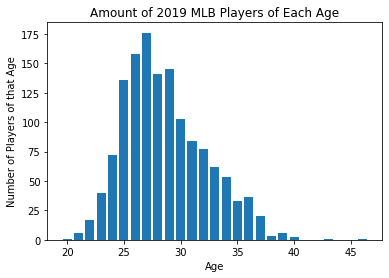

In [21]:
plt.bar(age_count["Age"], age_count["Number of Players of that Age"])
plt.xlabel('Age')
plt.ylabel('Number of Players of that Age')
plt.title("Amount of 2019 MLB Players of Each Age")
plt.savefig("output_data/num_ages_2019_mlb.png")

The r-squared value is: 0.0002952360099531353


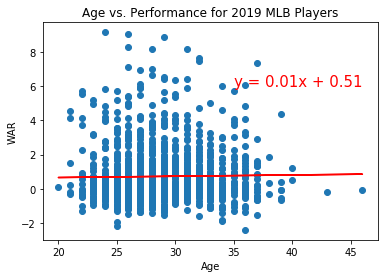

In [43]:
x_values = stats_war_df["Age"].astype(int)
y_values = stats_war_df["WAR"]

# Adds the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#stores regression line
regress_values = x_values * slope + intercept
# creates the formula of the line that will appear
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plots points
plt.scatter(x_values,y_values)
# plots regression line, ”r-“ makes the line a continuous
plt.plot(x_values,regress_values,"r-")
# makes the formula appear
plt.annotate(line_eq,(35,6),fontsize=15,color="red")
plt.xlabel("Age")
plt.ylabel("WAR")
plt.title("Age vs. Performance for 2019 MLB Players")
print(f"The r-squared value is: {rvalue**2}")
plt.savefig("output_data/ability_score_2019_mlb.png")
plt.show()

In [44]:
sorted_df = stats_war_df.sort_values("WAR", ascending = False)

sorted_df

Name Team Age           Birth City Birth Country Birth Lat  \
109    Cody Bellinger  LAD  24       Scottsdale, AZ           USA       NaN   
158      Alex Bregman  HOU  26      Albuquerque, NM           USA       NaN   
1109    Marcus Semien  OAK  29    San Francisco, CA           USA       NaN   
228      Matt Chapman  OAK  26      Victorville, CA           USA       NaN   
1248       Mike Trout  LAA  28         Vineland, NJ           USA       NaN   
...               ...  ...  ..                  ...           ...       ...   
311       Ian Desmond  COL  34         Sarasota, FL           USA       NaN   
564   David Hernandez  CIN  34       Sacramento, CA           USA       NaN   
163     Lewis Brinson  MIA  25  Fort Lauderdale, FL           USA       NaN   
180     Corbin Burnes  MIL  25      Bakersfield, CA           USA       NaN   
614     Edwin Jackson  ARI  36              Neu-Ulm       Germany       NaN   

     Birth Lng                 College College Lat College Lng      ID   WAR  
109        NaN                    None         NaN         NaN  641355  9.14  
158        NaN         Louisiana State         NaN         NaN  608324  9.06  
1109       NaN              California         NaN         NaN  543760  8.85  
228        NaN     Cal State Fullerton         NaN         NaN  656305  8.29  
1248       NaN                    None         NaN         NaN  545361  8.20  
...        ...                     ...         ...         ...     ...   ...  
311        NaN                    None         NaN         NaN  435622 -1.80  
564        NaN  Cosumnes River College         NaN         NaN  456696 -1.90  
163        NaN                    None         NaN         NaN  621446 -1.96  
180        NaN                    None         NaN         NaN  669203 -2.19  
614        NaN                    None         NaN         NaN  429719 -2.39  

[1373 rows x 12 columns]

The r-squared value is: 0.0006041286053331015


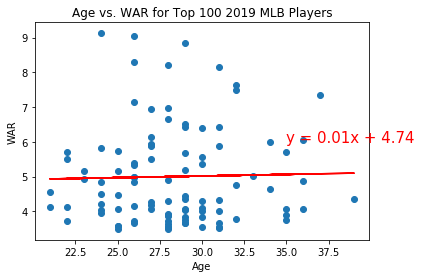

In [45]:
top_100 = sorted_df.iloc[0:100]
top_100

x_values = top_100["Age"].astype(int)
y_values = top_100["WAR"]

# Adds the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#stores regression line
regress_values = x_values * slope + intercept
# creates the formula of the line that will appear
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plots points
plt.scatter(x_values,y_values)
# plots regression line, ”r-“ makes the line a continuous
plt.plot(x_values,regress_values,"r-")
# makes the formula appear
plt.annotate(line_eq,(35,6),fontsize=15,color="red")
plt.xlabel("Age")
plt.ylabel("WAR")
plt.title("Age vs. WAR for Top 100 2019 MLB Players")
print(f"The r-squared value is: {rvalue**2}")
plt.savefig("output_data/war_top100_2019_mlb.png")
plt.show()

In [46]:
sorted_df_birth = sorted_df[sorted_df['Birth City'].notna()]
sorted_df_birth = sorted_df_birth[sorted_df_birth['Birth Country'].notna()]
sorted_df_birth

top_200_birth = sorted_df_birth.iloc[0:200]
top_200_birth

Name Team Age         Birth City Birth Country Birth Lat  \
109   Cody Bellinger  LAD  24     Scottsdale, AZ           USA       NaN   
158     Alex Bregman  HOU  26    Albuquerque, NM           USA       NaN   
1109   Marcus Semien  OAK  29  San Francisco, CA           USA       NaN   
228     Matt Chapman  OAK  26    Victorville, CA           USA       NaN   
1248      Mike Trout  LAA  28       Vineland, NJ           USA       NaN   
...              ...  ...  ..                ...           ...       ...   
436   Avisaíl García  MIL  28         Anzoategui     Venezuela       NaN   
1023    Tanner Roark  TOR  33     Wilmington, IL           USA       NaN   
2         José Abreu  CWS  33         Cienfuegos          Cuba       NaN   
236      Ji-Man Choi   TB  28            Incheon   South Korea       NaN   
411     Adam Frazier  PIT  28         Athens, GA           USA       NaN   

     Birth Lng              College College Lat College Lng      ID   WAR  
109        NaN                 None         NaN         NaN  641355  9.14  
158        NaN      Louisiana State         NaN         NaN  608324  9.06  
1109       NaN           California         NaN         NaN  543760  8.85  
228        NaN  Cal State Fullerton         NaN         NaN  656305  8.29  
1248       NaN                 None         NaN         NaN  545361  8.20  
...        ...                  ...         ...         ...     ...   ...  
436        NaN                 None         NaN         NaN  541645  2.05  
1023       NaN             Illinois         NaN         NaN  543699  2.04  
2          NaN                 None         NaN         NaN  547989  2.04  
236        NaN                 None         NaN         NaN  596847  2.02  
411        NaN    Mississippi State         NaN         NaN  624428  2.01  

[200 rows x 12 columns]

In [47]:
# itterate through every index and row of df
for index, row in top_200_birth.iterrows():
# sets target place to the name of each player's birth location
    target_place = "{0},{1}".format(row['Birth City'], row['Birth Country'])
# sets parameters for url
    params = {
        "address": target_place,
        "key": gkey
    }
# if geocode can find the coordinates for the college, proceed, if not, output a print statement
    try:
        base_url = "https://maps.googleapis.com/maps/api/geocode/json"
# extracts contents of API
        response = requests.get(base_url, params = params).json()
# sets variable to the path to take within the API dictionary
        results = response['results'][0]["geometry"]["location"]
# adds the lat and lng of each location to the df
        top_200_birth.loc[index, 'Birth Lat'] = results["lat"]
        top_200_birth.loc[index, 'Birth Lng'] = results["lng"]
    except IndexError:
        print("Can't find coordinates of town... skipping")

/Users/budchris/opt/anaconda3/envs/PythonData2020_1/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [48]:
top_200_birth

Name Team Age         Birth City Birth Country Birth Lat  \
109   Cody Bellinger  LAD  24     Scottsdale, AZ           USA   33.4942   
158     Alex Bregman  HOU  26    Albuquerque, NM           USA   35.0844   
1109   Marcus Semien  OAK  29  San Francisco, CA           USA   37.7749   
228     Matt Chapman  OAK  26    Victorville, CA           USA   34.5362   
1248      Mike Trout  LAA  28       Vineland, NJ           USA   39.4864   
...              ...  ...  ..                ...           ...       ...   
436   Avisaíl García  MIL  28         Anzoategui     Venezuela   8.59131   
1023    Tanner Roark  TOR  33     Wilmington, IL           USA   41.3078   
2         José Abreu  CWS  33         Cienfuegos          Cuba     22.16   
236      Ji-Man Choi   TB  28            Incheon   South Korea   37.4563   
411     Adam Frazier  PIT  28         Athens, GA           USA   33.9519   

     Birth Lng              College College Lat College Lng      ID   WAR  
109   -111.926                 None         NaN         NaN  641355  9.14  
158    -106.65      Louisiana State         NaN         NaN  608324  9.06  
1109  -122.419           California         NaN         NaN  543760  8.85  
228   -117.293  Cal State Fullerton         NaN         NaN  656305  8.29  
1248   -75.026                 None         NaN         NaN  545361  8.20  
...        ...                  ...         ...         ...     ...   ...  
436   -63.9586                 None         NaN         NaN  541645  2.05  
1023  -88.1467             Illinois         NaN         NaN  543699  2.04  
2     -80.4438                 None         NaN         NaN  547989  2.04  
236    126.705                 None         NaN         NaN  596847  2.02  
411   -83.3576    Mississippi State         NaN         NaN  624428  2.01  

[200 rows x 12 columns]

In [49]:
# saves df to csv
output_data_file2 = "output_data/birth_loc_mlb_2019.csv"
top_200_birth.to_csv(output_data_file2)

In [50]:
# saves csv to df so I don't have to run above cells every time
file_path2 = os.path.join("output_data/birth_loc_mlb_2019.csv")
top_200_birth = pd.read_csv(file_path2)

In [51]:
# Access maps with unique API key
gmaps.configure(api_key=gkey)

# creates heat map of birth locations of MLB Players of 2019 season
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(top_200_birth[["Birth Lat", "Birth Lng"]])
fig.add_layer(heatmap_layer)
fig


Figure(layout=FigureLayout(height='420px'))

In [52]:
sorted_df_college = sorted_df[sorted_df['College'].notna()]
sorted_df_college

top_200_college = sorted_df_college.iloc[0:200]
top_200_college

Name Team Age         Birth City Birth Country Birth Lat  \
158       Alex Bregman  HOU  26    Albuquerque, NM           USA       NaN   
1109     Marcus Semien  OAK  29  San Francisco, CA           USA       NaN   
228       Matt Chapman  OAK  26    Victorville, CA           USA       NaN   
300       Jacob deGrom  NYM  31         DeLand, FL           USA       NaN   
817         Mike Minor  TEX  32    Chapel Hill, TN           USA       NaN   
...                ...  ...  ..                ...           ...       ...   
948   Stephen Piscotty  OAK  29     Pleasanton, CA           USA       NaN   
760     Russell Martin  LAD  37      East York, ON        Canada       NaN   
110       Brandon Belt   SF  31    Nacogdoches, TX           USA       NaN   
157       John Brebbia  STL  29         Sharon, MA           USA       NaN   
677       Adam Kolarek  LAD  31      Baltimore, MD           USA       NaN   

     Birth Lng                 College College Lat College Lng      ID   WAR  
158        NaN         Louisiana State         NaN         NaN  608324  9.06  
1109       NaN              California         NaN         NaN  543760  8.85  
228        NaN     Cal State Fullerton         NaN         NaN  656305  8.29  
300        NaN                 Stetson         NaN         NaN  594798  8.15  
817        NaN              Vanderbilt         NaN         NaN  501985  7.65  
...        ...                     ...         ...         ...     ...   ...  
948        NaN                Stanford         NaN         NaN  572039  0.78  
760        NaN  Chipola Junior College         NaN         NaN  431145  0.78  
110        NaN                   Texas         NaN         NaN  474832  0.78  
157        NaN                    Elon         NaN         NaN  605154  0.76  
677        NaN                Maryland         NaN         NaN  592473  0.75  

[200 rows x 12 columns]

In [53]:
# saves df to csv
output_data_file3 = "output_data/college_mlb2019.csv"
top_200_college.to_csv(output_data_file3)

In [55]:
# saves csv to df so I don't have to run above cells every time
file_path3 = os.path.join("output_data", "college_mlb2019.csv")
top_200_college = pd.read_csv(file_path3)

# delete unnecessary column
del top_200_college['Unnamed: 0']
top_200_college

Name Team  Age         Birth City Birth Country  Birth Lat  \
0        Alex Bregman  HOU   26    Albuquerque, NM           USA        NaN   
1       Marcus Semien  OAK   29  San Francisco, CA           USA        NaN   
2        Matt Chapman  OAK   26    Victorville, CA           USA        NaN   
3        Jacob deGrom  NYM   31         DeLand, FL           USA        NaN   
4          Mike Minor  TEX   32    Chapel Hill, TN           USA        NaN   
..                ...  ...  ...                ...           ...        ...   
195  Stephen Piscotty  OAK   29     Pleasanton, CA           USA        NaN   
196    Russell Martin  LAD   37      East York, ON        Canada        NaN   
197      Brandon Belt   SF   31    Nacogdoches, TX           USA        NaN   
198      John Brebbia  STL   29         Sharon, MA           USA        NaN   
199      Adam Kolarek  LAD   31      Baltimore, MD           USA        NaN   

     Birth Lng                 College  College Lat  College Lng      ID   WAR  
0          NaN         Louisiana State          NaN          NaN  608324  9.06  
1          NaN              California          NaN          NaN  543760  8.85  
2          NaN     Cal State Fullerton          NaN          NaN  656305  8.29  
3          NaN                 Stetson          NaN          NaN  594798  8.15  
4          NaN              Vanderbilt          NaN          NaN  501985  7.65  
..         ...                     ...          ...          ...     ...   ...  
195        NaN                Stanford          NaN          NaN  572039  0.78  
196        NaN  Chipola Junior College          NaN          NaN  431145  0.78  
197        NaN                   Texas          NaN          NaN  474832  0.78  
198        NaN                    Elon          NaN          NaN  605154  0.76  
199        NaN                Maryland          NaN          NaN  592473  0.75  

[200 rows x 12 columns]

In [58]:
# itterate through every index and row of df
for index, row in top_200_college.iterrows():
# sets target place to the name of each player's college
    target_place = "{0}".format(row['College'])
# sets parameters for url
    params = {
        "address": target_place,
        "key": gkey
    }
# if geocode can find the coordinates for the college, proceed, if not, output a print statement
    try:
        base_url = "https://maps.googleapis.com/maps/api/geocode/json"
# extracts contents of API
        response = requests.get(base_url, params = params).json()
# sets variable to the path to take within the API dictionary
        results = response['results'][0]["geometry"]["location"]
# adds the lat and lng of each college to the df
        top_200_college.loc[index, 'College Lat'] = results["lat"]
        top_200_college.loc[index, 'College Lng'] = results["lng"]
    except IndexError:
        print("Can't find coordinates of school... skipping")

In [59]:
top_200_college

Name Team  Age         Birth City Birth Country  Birth Lat  \
0        Alex Bregman  HOU   26    Albuquerque, NM           USA        NaN   
1       Marcus Semien  OAK   29  San Francisco, CA           USA        NaN   
2        Matt Chapman  OAK   26    Victorville, CA           USA        NaN   
3        Jacob deGrom  NYM   31         DeLand, FL           USA        NaN   
4          Mike Minor  TEX   32    Chapel Hill, TN           USA        NaN   
..                ...  ...  ...                ...           ...        ...   
195  Stephen Piscotty  OAK   29     Pleasanton, CA           USA        NaN   
196    Russell Martin  LAD   37      East York, ON        Canada        NaN   
197      Brandon Belt   SF   31    Nacogdoches, TX           USA        NaN   
198      John Brebbia  STL   29         Sharon, MA           USA        NaN   
199      Adam Kolarek  LAD   31      Baltimore, MD           USA        NaN   

     Birth Lng                 College  College Lat  College Lng      ID   WAR  
0          NaN         Louisiana State    30.984298   -91.962333  608324  9.06  
1          NaN              California    36.778261  -119.417932  543760  8.85  
2          NaN     Cal State Fullerton    33.882923  -117.886926  656305  8.29  
3          NaN                 Stetson    29.034964   -81.303241  594798  8.15  
4          NaN              Vanderbilt    36.144703   -86.802655  501985  7.65  
..         ...                     ...          ...          ...     ...   ...  
195        NaN                Stanford    37.427475  -122.169719  572039  0.78  
196        NaN  Chipola Junior College    30.787413   -85.232581  431145  0.78  
197        NaN                   Texas    31.968599   -99.901813  474832  0.78  
198        NaN                    Elon    36.102688   -79.502331  605154  0.76  
199        NaN                Maryland    39.045755   -76.641271  592473  0.75  

[200 rows x 12 columns]

In [60]:
# Access maps with unique API key
gmaps.configure(api_key=gkey)

# creates heat map of birth locations of MLB players
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(top_200_college[["College Lat", "College Lng"]])
fig.add_layer(heatmap_layer)
fig


Figure(layout=FigureLayout(height='420px'))